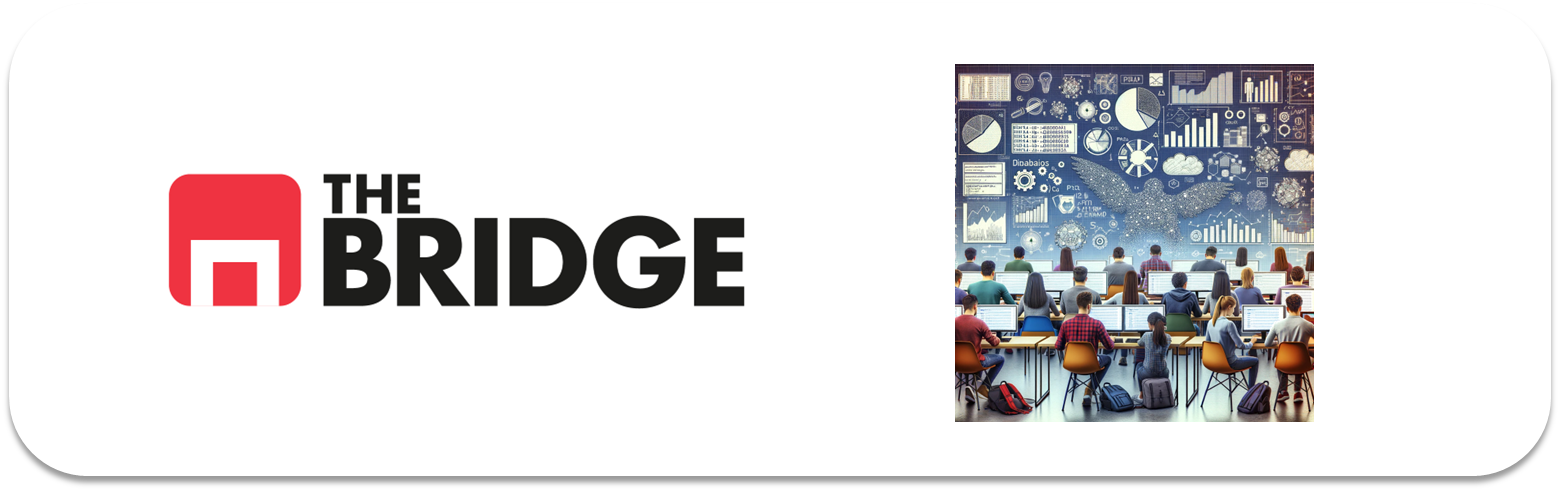

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [3]:
# 1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
prices_houses = pd.read_csv('data/hard_to_find/obligatoria_hard.csv', sep="|")
prices_houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:

prices_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


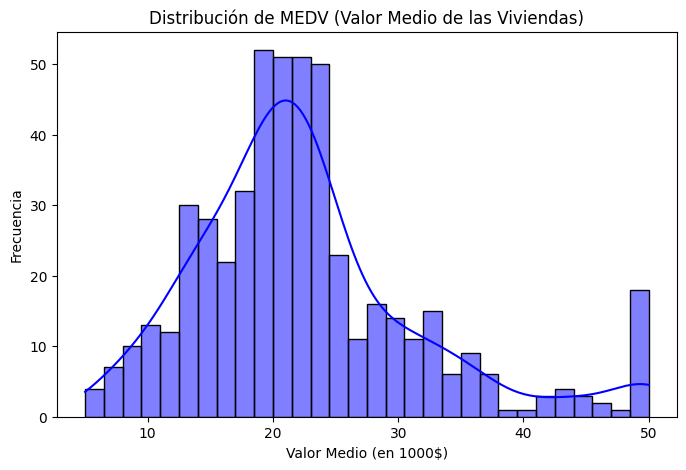

In [5]:
# 2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
# Distribución de MEDV
plt.figure(figsize=(8, 5))
sns.histplot(prices_houses["MEDV"], kde=True, bins=30, color="blue")
plt.title("Distribución de MEDV (Valor Medio de las Viviendas)")
plt.xlabel("Valor Medio (en 1000$)")
plt.ylabel("Frecuencia")
plt.show()

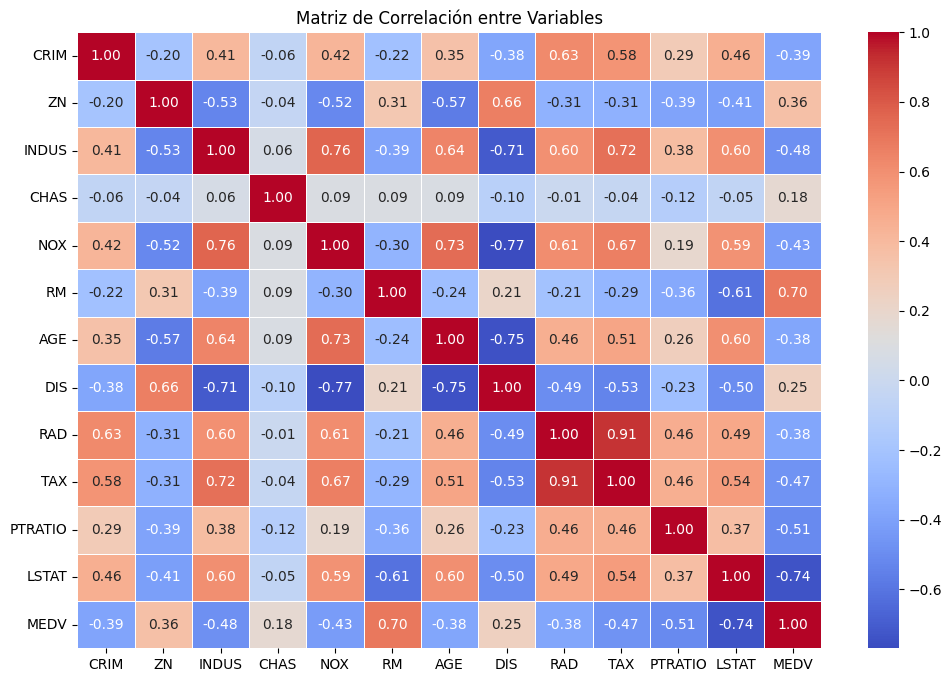

In [6]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = prices_houses.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

In [7]:
# Separar características (X) y target (y)
X = prices_houses.drop(columns=["MEDV"])  # Variables predictoras
y = prices_houses["MEDV"]  # Target

print("\nCaracterísticas predictoras (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Características predictoras (X):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO  LSTAT  
0     15.3   4.98  
1     17.8   9.14  
2     17.8   4.03  
3     18.7   2.94  
4     18.7   5.33  

Target (y):
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [9]:
# 3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

from sklearn.model_selection import train_test_split

# Dividimos en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:

# 4. Construye las parejas X,y de train y test

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (404, 12)
Tamaño de X_test: (102, 12)
Tamaño de y_train: (404,)
Tamaño de y_test: (102,)


MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


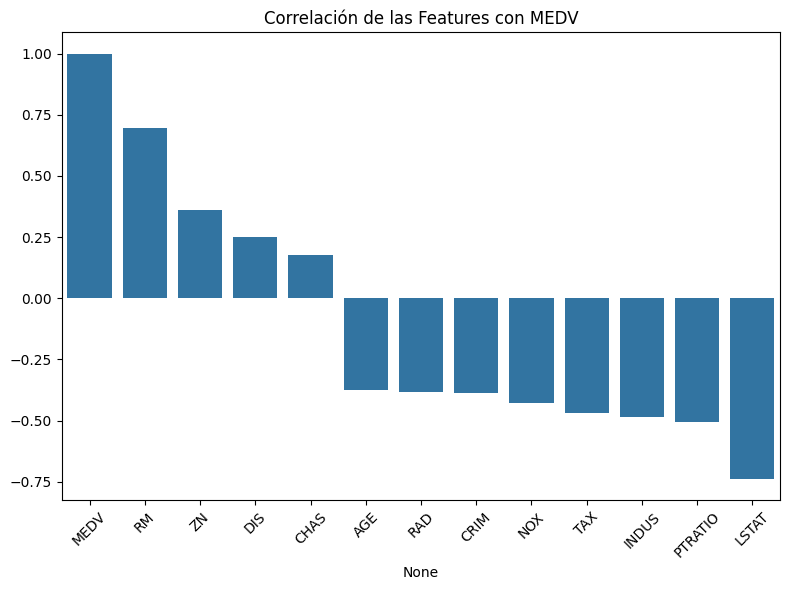

In [11]:
# 5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
# Calcular la correlación de todas las columnas con el target (MEDV)
correlations = prices_houses.corr()["MEDV"].sort_values(ascending=False)
print(correlations)

# Visualizar las correlaciones más relevantes
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title("Correlación de las Features con MEDV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

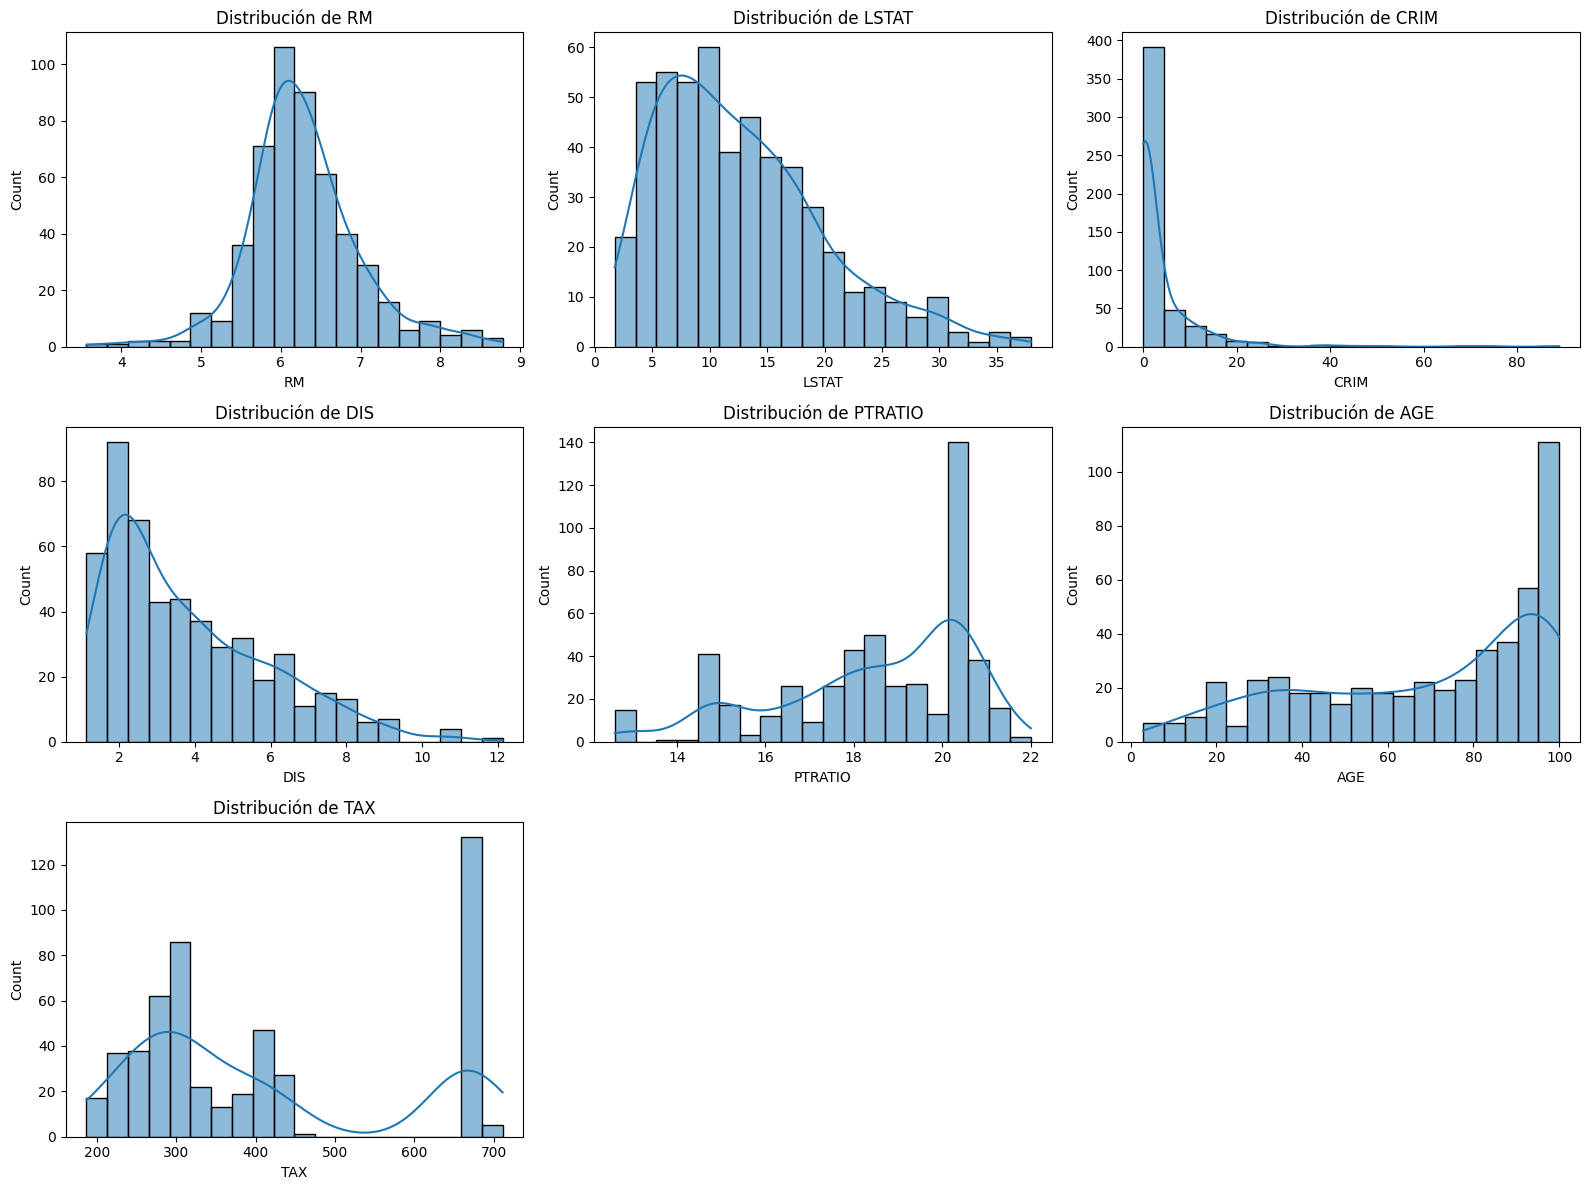

In [12]:
# Visualizar distribuciones de las características más relevantes
features = ["RM", "LSTAT", "CRIM", "DIS", "PTRATIO", "AGE", "TAX"]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(prices_houses[feature], kde=True, bins=20)
    plt.title(f"Distribución de {feature}")
plt.tight_layout()
plt.show()

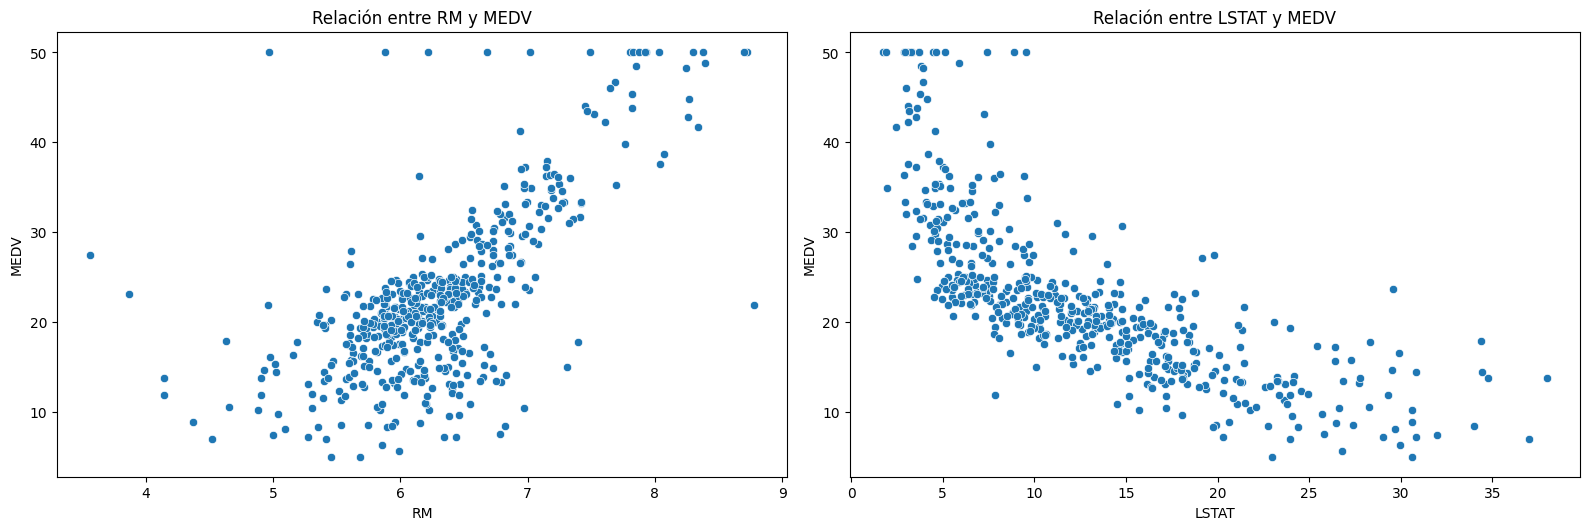

In [13]:

# Relación entre variables clave y el target
features_to_analyze = ["RM", "LSTAT"]

plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=prices_houses[feature], y=prices_houses["MEDV"])
    plt.title(f"Relación entre {feature} y MEDV")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
plt.tight_layout()
plt.show()

In [14]:
# Selección de las features finales
features_seleccionadas = ["RM", "LSTAT", "PTRATIO", "CRIM", "DIS", "AGE"]
X = X[features_seleccionadas]
print(X.head())

      RM  LSTAT  PTRATIO     CRIM     DIS   AGE
0  6.575   4.98     15.3  0.00632  4.0900  65.2
1  6.421   9.14     17.8  0.02731  4.9671  78.9
2  7.185   4.03     17.8  0.02729  4.9671  61.1
3  6.998   2.94     18.7  0.03237  6.0622  45.8
4  7.147   5.33     18.7  0.06905  6.0622  54.2


In [15]:

# 6. Trata las variables para que funcionen lo mejor posible en el modelo.
y = prices_houses["MEDV"]

# 7. Construye un modelo de regresión lineal.

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Crear el modelo de Regresión Lineal
lr = LinearRegression()

# Entrenar el modelo
lr.fit(X_train, y_train)

# Coeficientes del modelo
print("Coeficientes del Modelo:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef:.4f}")

# Intercepto del modelo
print(f"Intercepto: {lr.intercept_:.4f}")

Coeficientes del Modelo:
RM: -0.1272
LSTAT: 0.0308
PTRATIO: 0.0252
CRIM: 3.0495
DIS: -18.1832
AGE: 4.2401
Intercepto: 36.9705


In [18]:
# Predicciones en el conjunto de prueba
y_pred = lr.predict(X_test)

# Cálculo de métricas
mse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 4.77
Mean Absolute Error (MAE): 3.11
R-Squared (R²): 0.69


In [19]:
# 8. Analiza si lo crees conveniente los pesos y la importancia de las features.
# 9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.


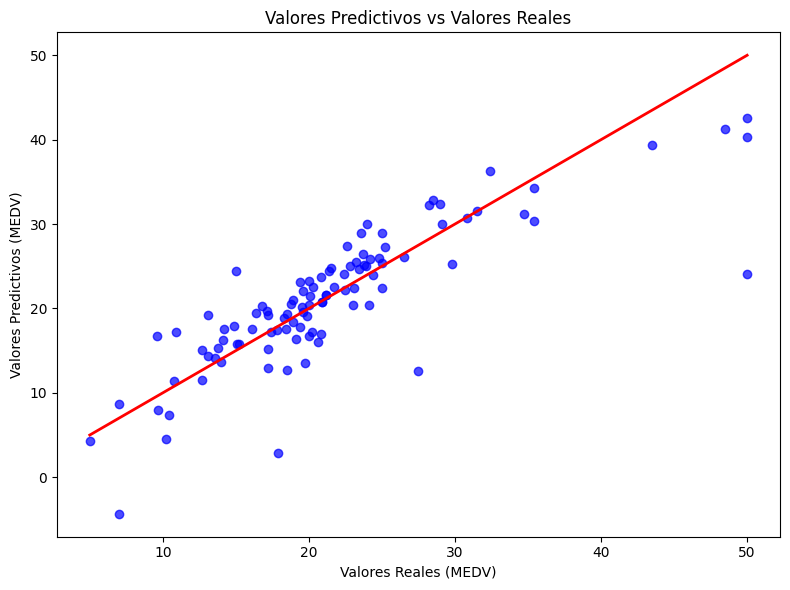

In [20]:

# Comparar predicciones y valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="-", linewidth=2)
plt.title("Valores Predictivos vs Valores Reales")
plt.xlabel("Valores Reales (MEDV)")
plt.ylabel("Valores Predictivos (MEDV)")
plt.tight_layout()
plt.show()

In [21]:
# 10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir los valores de hiperparámetros para la búsqueda
ridge_params = {'alpha': [0.1, 6.0, 10.0]}

# Modelo Ridge con búsqueda de hiperparámetros
ridge_model = Ridge()
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# Mejor modelo y resultados
best_ridge = ridge_grid.best_estimator_
print(f"Mejor Alpha para Ridge: {ridge_grid.best_params_['alpha']}")
print(f"R² en Conjunto de Prueba (Ridge): {ridge_grid.best_score_:.4f}")

# Predicciones
y_pred_ridge = best_ridge.predict(X_test)

# Métricas
mse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"MSE (Ridge): {mse_ridge:.2f}")
print(f"MAE (Ridge): {mae_ridge:.2f}")

Mejor Alpha para Ridge: 0.1
R² en Conjunto de Prueba (Ridge): 0.7144
MSE (Ridge): 4.77
MAE (Ridge): 3.10


In [22]:
from sklearn.linear_model import Lasso

# Definir los valores de hiperparámetros para la búsqueda
lasso_params = {'alpha': [0.08, 0.1, 1.0]}

# Modelo Lasso con búsqueda de hiperparámetros
lasso_model = Lasso()
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

# Mejor modelo y resultados
best_lasso = lasso_grid.best_estimator_
print(f"Mejor Alpha para Lasso: {lasso_grid.best_params_['alpha']}")
print(f"R² en Conjunto de Prueba (Lasso): {lasso_grid.best_score_:.4f}")

# Predicciones
y_pred_lasso = best_lasso.predict(X_test)

# Métricas
mse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"MSE (Lasso): {mse_lasso:.2f}")
print(f"MAE (Lasso): {mae_lasso:.2f}")

Mejor Alpha para Lasso: 0.08
R² en Conjunto de Prueba (Lasso): 0.6986
MSE (Lasso): 4.87
MAE (Lasso): 3.09


In [23]:
from sklearn.linear_model import ElasticNet

# Definir los hiperparámetros para ElasticNet
elastic_params = {
    'alpha': [0.01, 0.1, 1.0],  # Penalización general
    'l1_ratio': [0.2, 0.5, 0.8]  # Proporción entre L1 (Lasso) y L2 (Ridge)
}

# Modelo ElasticNet con GridSearchCV
elastic_model = ElasticNet()
elastic_grid = GridSearchCV(estimator=elastic_model, param_grid=elastic_params, cv=5, scoring='r2')
elastic_grid.fit(X_train, y_train)

# Mejor modelo y resultados
best_elastic = elastic_grid.best_estimator_
print(f"Mejor Alpha: {elastic_grid.best_params_['alpha']}")
print(f"Mejor L1 Ratio: {elastic_grid.best_params_['l1_ratio']}")
print(f"R² en Conjunto de Entrenamiento (ElasticNet): {elastic_grid.best_score_:.4f}")

# Predicciones con el modelo ElasticNet
y_pred_elastic = best_elastic.predict(X_test)

# Métricas de Evaluación
mse_elastic = root_mean_squared_error(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
print(f"MSE (ElasticNet): {mse_elastic:.2f}")
print(f"MAE (ElasticNet): {mae_elastic:.2f}")

Mejor Alpha: 0.01
Mejor L1 Ratio: 0.8
R² en Conjunto de Entrenamiento (ElasticNet): 0.7106
MSE (ElasticNet): 4.80
MAE (ElasticNet): 3.06


In [24]:
# Resumen de Resultados
results = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet'],
    'Mejor Alpha': ['-', ridge_grid.best_params_['alpha'], lasso_grid.best_params_['alpha'], elastic_grid.best_params_['alpha']],
    'Mejor L1 Ratio': ['-', '-', '-', elastic_grid.best_params_['l1_ratio']],
    'MSE': [mse, mse_ridge, mse_lasso, mse_elastic],
    'MAE': [mae, mae_ridge, mae_lasso, mae_elastic],
    'R²': [r2, ridge_grid.best_score_, lasso_grid.best_score_, elastic_grid.best_score_]
})

print(results)

              Modelo Mejor Alpha Mejor L1 Ratio       MSE       MAE        R²
0  Linear Regression           -              -  4.772600  3.111377  0.689397
1   Ridge Regression         0.1              -  4.774047  3.100381  0.714362
2   Lasso Regression        0.08              -  4.874423  3.091138  0.698582
3         ElasticNet        0.01            0.8  4.798214  3.057423  0.710616


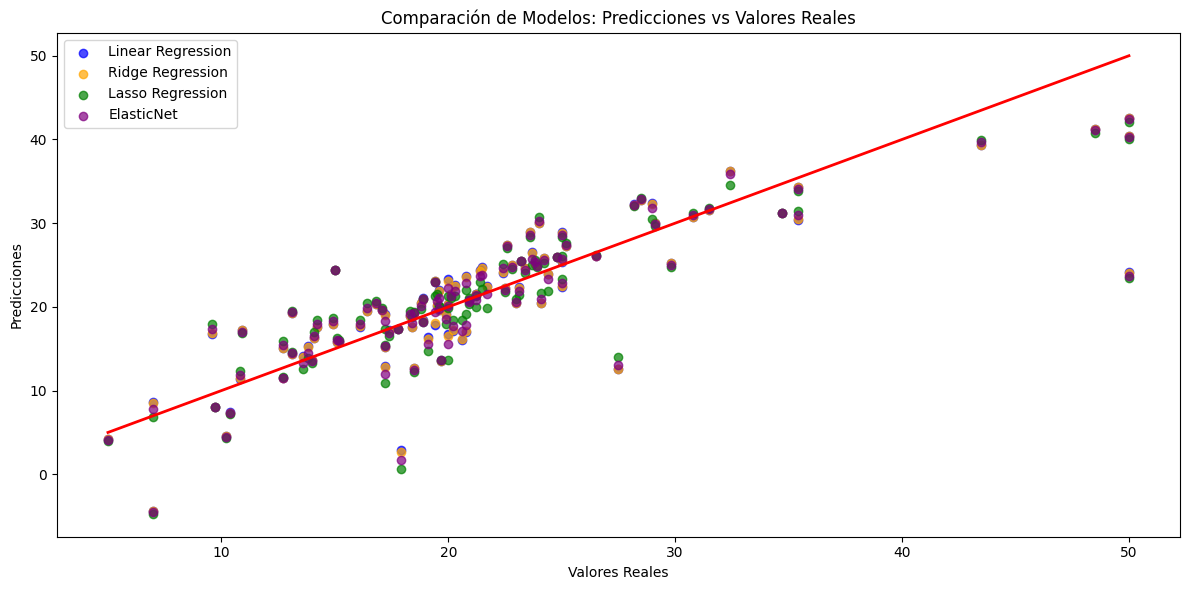

In [25]:
# Comparar predicciones de ElasticNet con otros modelos
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Linear Regression", color="blue")
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label="Ridge Regression", color="orange")
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label="Lasso Regression", color="green")
plt.scatter(y_test, y_pred_elastic, alpha=0.7, label="ElasticNet", color="purple")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="-", linewidth=2)
plt.title("Comparación de Modelos: Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.tight_layout()
plt.show()

### 11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?
Nos quedaríamos con el modelo Ridge Regression porque tiene una regularización efectiva y buen rendimiento porque es más robusto respecto a Linear Regression.